In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
nba = pd.read_csv("final_table.csv", index_col=0)
nba.fillna(0, inplace=True)

In [2]:
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# create database for g-league players and player who sat
# out and did not play all year 
games= nba[ nba['pts'] <= 100.0 ]
games

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
637,Paul Watson,TOR,SF,50752.0,1637.16,25.0,-7.1,31.0,8.0,70.0,5.0,3.0,1.0
603,Cameron Payne,PHO,PG,196288.0,2256.18,25.0,15.7,87.0,8.0,183.0,24.0,8.0,2.0
614,Johnathan Williams,WAS,C,106181.0,2359.58,24.0,14.0,45.0,15.0,180.0,8.0,1.0,8.0
604,Mychal Mulder,GSW,SG,187782.0,2438.73,25.0,7.8,77.0,7.0,204.0,8.0,2.0,1.0
620,Donta Hall,BRK,PF,101504.0,3075.88,22.0,17.2,33.0,5.0,85.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(nba[nba['Player']=="Darius Bazley"])

            Player   tm pos  yr2019_20  avg_cost_per_pt   Age  PER    pts  \
384  Darius Bazley  OKC  PF  2284800.0           6680.7  19.0  9.6  342.0   

        g      mp   ast   stl   blk  
384  61.0  1130.0  41.0  23.0  41.0  


In [5]:
# remove players that did not play any games due to injury and G-league/developmental league players 
# based on nba salary scale and not to account those during predictions
index_names = nba[ nba['pts'] <= 100.0 ].index
# drop these row indexes 
# from dataFrame 
nba.drop(index_names, inplace = True) 
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,16229213.0,131944.82,30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0
95,Brandon Knight,DET,PG,15643750.0,150420.67,28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0
34,Otto Porter,CHI,SF,27250576.0,163177.10,26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0
40,Andre Drummond,CLE,C,27093019.0,193521.56,26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0


In [6]:
nba.columns

Index(['Player', 'tm', 'pos', 'yr2019_20', 'avg_cost_per_pt', 'Age', 'PER',
       'pts', 'g', 'mp', 'ast', 'stl', 'blk'],
      dtype='object')

In [7]:
#mask = np.random.rand(len(nba))<0.8
# mask = np.random.rand(len(nba))<0.1
# nba_train =nba[mask]
# nba_test=nba[~mask]
nba_train= nba
nba_test=nba
print ('training data set length='+str(len(nba_train)))
print("testing data set length="+str(len(nba_test)))

training data set length=345
testing data set length=345


In [8]:
# setup the regression in patsy notation. telling patsy that
#"yr2019_20"/salary is our dependent variable and it
# depends on the regression variables: age, per, pts, g, mp, ast, stl
# and blocks
expr = """yr2019_20~Age+PER+pts+g+mp+ast+stl+blk"""

In [9]:
# set up X and y
y_train,X_train= dmatrices(expr,nba_train,return_type='dataframe')
y_test, X_test = dmatrices(expr,nba_test, return_type='dataframe')

In [10]:
# using the statsmodel GLM class train the poisson regression model on the training set
poisson_training_results =sm.GLM(y_train,X_train, family=sm.families.Poisson()).fit()

In [11]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              yr2019_20   No. Observations:                  345
Model:                            GLM   Df Residuals:                      336
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.5367e+08
Date:                Tue, 08 Dec 2020   Deviance:                   1.1073e+09
Time:                        14:34:46   Pearson chi2:                 1.11e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9748      0.000   7.61e+04      0.0

In [12]:
poisson_predictions=poisson_training_results.get_prediction(X_test)

In [13]:
prediction_summary_frame=poisson_predictions.summary_frame()

In [14]:
prediction_summary_frame.astype("int64")

,mean,mean_se,mean_ci_lower,mean_ci_upper
612,2751941,151,2751644,2752238
587,3123511,149,3123217,3123804
545,5894305,234,5893846,5894763
606,3624306,170,3623972,3624641
530,12321126,733,12319689,12322563
...,...,...,...,...
90,15489493,684,15488150,15490835
95,7349934,600,7348758,7351110
34,10838315,473,10837387,10839243
40,18212941,1118,18210750,18215133


In [15]:
predicted_salary = prediction_summary_frame['mean'].astype("int64")
predicted_salary=predicted_salary
#predicted_counts=predicted_counts.style.format("${:,.2f}")
predicted_salary


612     2751941
587     3123511
545     5894305
606     3624306
530    12321126
         ...   
90     15489493
95      7349934
34     10838315
40     18212941
0      28710478
Name: mean, Length: 345, dtype: int64

In [16]:
actual_salary= y_test['yr2019_20']
actual_salary.sample(5)

427     1964760.0
113    14057730.0
30     27285000.0
236     5806440.0
264     4767000.0
Name: yr2019_20, dtype: float64

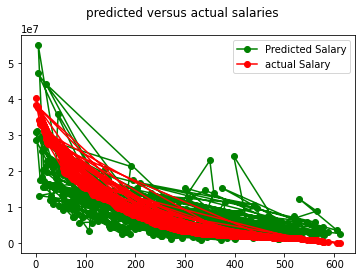

In [17]:
fig=plt.figure()
fig.suptitle('predicted versus actual salaries')
predicted, =plt.plot(X_test.index, predicted_salary,'go-',
                 label="Predicted Salary")
actual, =plt.plot(X_test.index, actual_salary,'ro-',
                 label="actual Salary")
plt.legend(handles=[predicted, actual])

In [18]:
nba['predicted_salary'] = predicted_salary
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,3123511
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,5894305
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3624306
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,12321126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,16229213.0,131944.82,30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0,15489493
95,Brandon Knight,DET,PG,15643750.0,150420.67,28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0,7349934
34,Otto Porter,CHI,SF,27250576.0,163177.10,26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0,10838315
40,Andre Drummond,CLE,C,27093019.0,193521.56,26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0,18212941


In [19]:
nba_salaries=pd.concat([nba, games], ignore_index=True, sort=False)
nba_salaries

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
0,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941.0
1,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,3123511.0
2,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,5894305.0
3,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3624306.0
4,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,12321126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
522,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
523,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
524,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
nba_salaries['predicted_salary'] = nba_salaries['predicted_salary'].fillna(0)
nba_salaries.sample(10)

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
419,J.R. Smith,LAL,SG,1456667.0,85686.29,34.0,0.0,17.0,6.0,79.0,3.0,1.0,0.0,0.0
51,Chris Boucher,TOR,PF,1588231.0,3864.31,27.0,20.7,411.0,62.0,819.0,26.0,22.0,61.0,3795965.0
332,James Johnson,MIN,PF,15349400.0,91365.48,32.0,11.1,168.0,14.0,338.0,53.0,19.0,19.0,14187201.0
167,Alec Burks,PHI,SG,2320044.0,10545.65,28.0,16.1,220.0,18.0,364.0,38.0,12.0,0.0,11584674.0
189,Norman Powell,TOR,SG,10116576.0,12188.65,26.0,16.8,830.0,52.0,1479.0,91.0,60.0,21.0,9745775.0
438,Luka Šamanić,SAS,PF,2689920.0,168120.00,20.0,8.8,16.0,3.0,48.0,6.0,0.0,2.0,0.0
274,Cody Zeller,CHO,C,14471910.0,22541.92,27.0,18.8,642.0,58.0,1341.0,88.0,40.0,25.0,7988674.0
282,Khris Middleton,MIL,SF,30603448.0,23595.57,28.0,21.1,1297.0,62.0,1853.0,265.0,53.0,7.0,15612943.0
520,Sheldon Mac,0,0,81678.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,Jerome Robinson,WAS,SG,3567720.0,18110.25,22.0,7.4,197.0,21.0,503.0,41.0,15.0,9.0,4125266.0


In [21]:
def salaries(row):
    if row['predicted_salary']==0.0:
        return row['yr2019_20']
    else:
        return row['predicted_salary']
nba_salaries['predicted_salary']=nba_salaries.apply(lambda row: salaries(row),axis=1)
nba_salaries 

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
0,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941.0
1,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,3123511.0
2,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,5894305.0
3,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3624306.0
4,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,12321126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50752.0
522,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0
523,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0
524,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0


In [22]:
nba_salaries= nba_salaries[["Player", "tm", "pos", "yr2019_20","predicted_salary", "Age","PER", "pts", "g", "mp", "ast", "stl", "blk"]]
nba_salaries['yr2019_20']=nba_salaries['yr2019_20'].map("${:,.2f}".format)
nba_salaries['predicted_salary']=nba_salaries['predicted_salary'].map("${:,.2f}".format)

#nba_salaries[['yr2019_20', 'predicted_salary']].apply(lambda x: map(lambda x:'${:,.2f}'.format(x),x),axis=1)
nba_salaries.sample(20)

<ipython-input-22-d716a586a59d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_salaries['yr2019_20']=nba_salaries['yr2019_20'].map("${:,.2f}".format)
<ipython-input-22-d716a586a59d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_salaries['predicted_salary']=nba_salaries['predicted_salary'].map("${:,.2f}".format)


,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
298,Jimmy Butler,MIA,SF,"$32,742,000.00","$29,630,355.00",30.0,23.6,1157.0,58.0,1959.0,350.0,103.0,32.0
7,Kendrick Nunn,MIA,SG,"$1,416,852.00","$6,298,165.00",24.0,12.9,1024.0,67.0,1962.0,220.0,56.0,15.0
122,Alex Caruso,LAL,PG,"$2,750,000.00","$2,422,589.00",25.0,10.8,349.0,64.0,1175.0,124.0,70.0,18.0
189,Norman Powell,TOR,SG,"$10,116,576.00","$9,745,775.00",26.0,16.8,830.0,52.0,1479.0,91.0,60.0,21.0
426,Al-Farouq Aminu,ORL,PF,"$9,258,000.00","$9,258,000.00",29.0,7.6,78.0,18.0,380.0,21.0,18.0,8.0
176,Markelle Fultz,ORL,PG,"$9,745,200.00","$4,239,796.00",21.0,14.3,870.0,72.0,1996.0,369.0,90.0,11.0
247,Elfrid Payton,NYK,PG,"$8,000,000.00","$8,365,929.00",25.0,16.0,449.0,45.0,1246.0,323.0,70.0,17.0
45,Aaron Holiday,IND,PG,"$2,239,200.00","$3,549,613.00",23.0,11.6,627.0,66.0,1617.0,225.0,55.0,16.0
228,Tomáš Satoranský,CHI,PG,"$10,000,000.00","$9,274,646.00",28.0,13.5,644.0,65.0,1878.0,354.0,80.0,7.0
56,Jamal Murray,DEN,PG,"$4,444,746.00","$9,030,289.00",22.0,17.7,1091.0,59.0,1904.0,284.0,67.0,17.0


In [23]:
nba_salaries

,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
nba_salaries.to_csv("poisson_regression.csv")

In [30]:
nba_salaries.to_json("salaries_prediction.json", orient="records",)

In [31]:
teams=pd.read_json("salaries_prediction.json")
teams

,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20,7.6,244,36,820,27,31,4
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22,9.1,335,45,1015,131,44,10
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23,14.5,837,60,1654,127,32,13
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23,11.6,168,29,412,63,14,6
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24,15.8,1145,63,2211,471,62,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0,0.0,0,0,0,0,0,0
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0,0.0,0,0,0,0,0,0
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0,0.0,0,0,0,0,0,0
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0,0.0,0,0,0,0,0,0


In [28]:
print(nba_salaries[nba_salaries['tm']=="GSW"])

                    Player   tm pos       yr2019_20 predicted_salary   Age  \
1                Ky Bowman  GSW  PG     $350,189.00    $3,123,511.00  22.0   
2            Eric Paschall  GSW  PF     $898,310.00    $5,894,305.00  23.0   
5               Damion Lee  GSW  SG     $842,327.00    $8,977,062.00  27.0   
8          Marquese Chriss  GSW  PF     $758,804.00    $4,170,409.00  22.0   
52            Jordan Poole  GSW  SG   $1,964,760.00    $1,937,210.00  20.0   
81          Omari Spellman  GSW  PF   $1,897,800.00    $3,088,732.00  22.0   
322         Draymond Green  GSW  PF  $18,539,130.00   $10,678,414.00  29.0   
337         Andrew Wiggins  GSW  SG  $27,504,630.00   $12,052,888.00  24.0   
344          Stephen Curry  GSW  PG  $40,231,758.00   $28,710,478.00  31.0   
348          Mychal Mulder  GSW  SG     $187,782.00      $187,782.00  25.0   
350           Jeremy Pargo  GSW  PG      $91,557.00       $91,557.00  33.0   
351  Juan Toscano-Anderson  GSW  SF     $350,189.00      $350,18